# Project 1: Investigating the No-Show Appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Given data on the characteristics of people that show up and those that do not show up for their medical appointments, this project seeks to identify the characteristics that describe wheather or not a patient will show up for their medical appointment. 


> The major questions this project seeks to explore are as follows: 
> - Does sending an SMS reminder of an appointment affect the number of no-shows?
> - Do more handicapped patients show up for their appointments as compared to patients who are not handicapped?
> - Are females or males more likely to miss their appointment?

>__Note:__ No-show appointments have the value 'Yes' and fulfilled appointments have the value 'No' in the no-show column of the dataset. 


<a id='wrangling'></a>
## Data Wrangling

### Imports of useful packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

#### Loading the data and inspecting it (looking for missing value, checking for errant data, etc.)

In [2]:
# Using pandas to load the data into the workspace
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 

In [3]:
#Reading the first few lines of the data 
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
#check the shape of the data
df.shape

(110527, 14)

In [5]:
# Check for missing values and dataypes of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Check for duplicates
df.duplicated().sum()

0

In [7]:
#Check summary statistics of numeric columns 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 __Observation__: The minimum age in the age column is -1. Are there other errant values in the age column?

In [8]:
#
df[df['Age'] <= 0].Age.value_counts()


 0    3539
-1       1
Name: Age, dtype: int64

__Observation__: There are a lot of patients with the age zero. Although the zero ages may be justified, I am still unsure about the zero age in this dataset. 
Since I already have a good amount of datapoints, I would remove these rows instead of replacing the values with the mean or any other values. This, I think would prevent the increament in the number of people in a particular age group unduely. 

### Data Cleaning (Column formatting and removal of wrong ages)

> The No-Show dataset has 110,527 rows and 14 columns. 

>The dataset is pretty clean as it has no null values and the columns of interest to this project are in an appropriate datatype. 
> However, to keep things uniform, it would be helpful to change all column names to lower case letters and to replace the hyphens with underscores.


>In addition, the rows with ages that are equal to -1 or 0 have to be removed from the data

In [9]:
# Extracting the columns of the dataset and converting them to lower case 
col_names = df.columns.str.lower()
col_names

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [10]:
# Assign the new columns  
df.columns = col_names
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [11]:
# See how the dataframe is looking like now 
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Using the code cells above, the column names have been changed to lower cases and the hyphen in 'no-show' has been converted to an underscore. 

Now, we can drop the rows where the age is zero or below

In [12]:
#extract the rows where the age is zero or below
age_below_0 = df[df['age']<=0]

In [13]:
#Use the drop function to drop these rows
df.drop(age_below_0.index, inplace=True, axis = 0)

In [14]:
#Check to see if the change has been effected
sum(df['age'] <=0)

0

Now that we have named the columns properly and removed the rows where the age is zero or less, we can now move on to the exploratory data analysis. 

<a id='eda'></a>
## Exploratory Data Analysis


### Does sending an SMS reminder of an appointment affect the number of no-shows?
> To answer this question, we can compare the number of people who received an sms and those who did not, given that they showed up for their appointment.

First, let us look at how many people showed up for appointments and those that do not show up. 

In [15]:
df.no_show.value_counts()

No     85307
Yes    21680
Name: no_show, dtype: int64

This shows that, more people show up for their appointments than those who do not show. 
Now, for those who did show up for their appointment, were the people who received an sms more than those who did not?

In [16]:
#we can create a mask to retrieved those who showed up for the appointment. 
showed = df.no_show == 'No'

In [17]:
#For those who showed up, how many recieved an sms or not?
showed_groups = df[showed].sms_received.value_counts()
showed_groups

0    60290
1    25017
Name: sms_received, dtype: int64

This can be better visualized with a bar plot. 

A function for plotting bar plots can be defined to prevent repeating the code for plotting bar plots several times. 

In [33]:
def bar_plot(labels, heights, xlabel= None, ylabel= None, title=None):
    plt.bar(labels, heights)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show();

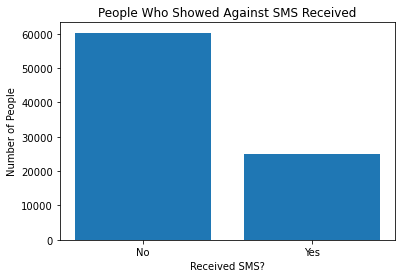

In [34]:
bar_plot(['No','Yes'], 
         showed_groups, 
         'Received SMS?',
         'Number of People',
         'People Who Showed Against SMS Received')

>__Observation:__ From the bar plot above, we can see that more people showed up even though they did not receive an sms. 

## Do more handicapped patients show up for their appointments as compared to patients who are not handicapped? 

>We can address this question by comparing the number of handicapped patients who show up to that of those who do not show up.We can also compare the proportion of handicapped patients who showed up to non-handicapped patients who showed up.

First, we can get a sense of the number of handicapped patients and non-handicapped patients.

In [40]:
#First group the handicap column by those who are handicapped and those who are not
handcap_groups = df.groupby(['handcap'])['age']
handcap_groups.count()

handcap
0    104747
1      2041
2       183
3        13
4         3
Name: age, dtype: int64

From the above grouping, we can see that there are values above 1 in the handcap column. However, the documentation on Kaggle, where the dataset was obtained, stated that this column is supposed to have True or False values. Hence, according to standard Boolean evaluation we can take all values of 1 and above as True and values of zero as False. 

We can then move on to investigate if handicapped people genrally show up for their appointments. 

In [21]:
# get the number of handicapped people who showed up and those who did not show
handcap_showed = sum(df.query('no_show == "No"')['handcap'] > 0)
handcap_no_show = sum(df.query('no_show == "Yes"')['handcap'] > 0)

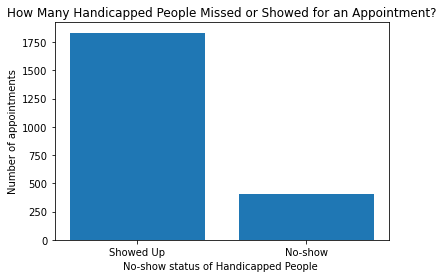

In [22]:
bar_plot(['Showed Up', 'No-show'], 
        [handcap_showed, handcap_no_show],
        'No-show status of Handicapped People ',
       'Number of appointments',
       'How Many Handicapped People Missed or Showed for an Appointment?')

The plot above shows that more handicapped people showed up for their appointments.

Now we can compare the number of handicapped people who showed up to that of people who are not handicapped. To do this we can compute the percent of people who showed up for each group. 

In [29]:
#Get the total number for each group
handcap_total = sum(df['handcap']> 0)
not_handcap_total = sum(df['handcap']== 0)

In [30]:
#Compute the percentage that showed up for each group
handcap_showed_percent = handcap_showed/handcap_total
not_handcap_showed = sum(df.query('no_show == "No"')['handcap'] == 0)/not_handcap_total

In [31]:
handcap_showed_percent

0.8183035714285715

In [32]:
not_handcap_showed

0.7969106513790372

Let use visualized this with a bar plot

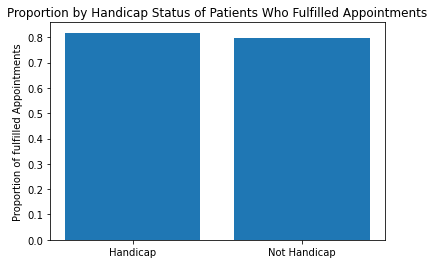

In [36]:
bar_plot(['Handicap', 'Not Handicap'],
        [handcap_showed_percent, not_handcap_showed],
        ylabel='Proportion of fulfilled Appointments',
        title='Proportion by Handicap Status of Patients Who Fulfilled Appointments')

As shown from the bar plot above, handicap patients are more likely to show up for their appointment as compared to to patients who are not handicapped. 

Although the number of handicapped patients were less than patients who are not handicapped, computing the proportions helped us to correctly make the comparison. 

### Do more females or males miss their appointments?

> Here we would like to find out which gender missed appointments most. We can do this by obtaining the proportion of females that do not show up and comparing with that of males that do not show up for their appointments.

> By taking proportions and not the actual number of missed apointments by genders, we can more accurately tell the difference between no-shows by gender.

In [25]:
#seperate dataframes for genders
fem = df[df['gender'] == 'F']
male = df[df['gender'] == 'M']

In [26]:
#Get the proportion of males and females that do no show up out of all the no shows

num_no_show = sum(df['no_show'] == 'Yes') #total number of no-shows
female_no_show = sum(fem['no_show'] == 'Yes')/num_no_show
male_no_show = sum(male['no_show'] == 'Yes')/num_no_show


We can now compare these proprotions with a pie plot.

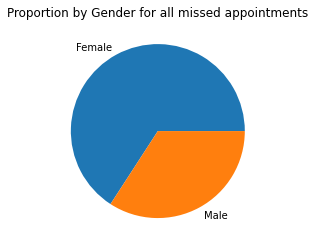

In [27]:
plt.pie([female_no_show, male_no_show], labels=['Female','Male'])
plt.title('Proportion by Gender for all missed appointments');

From the above plot, we can see that more females miss their appointments as compared to males. 

<a id='conclusions'></a>
## Conclusions

Firstly, it was observed that more people showed up for their appointments even though they had not received an sms reminder of their appointments. Hence, sms reminders did not affect the number of no-show appointments. 

Also, handicapped patients generally show up for their appointments as compared to patients who are not handicapped. 
In addition, out of all missed appointments, the number of appointments missed by females is higher than that missed by males. 

> ### Limitations
Most of the columns or features in the data contained discrete values instead of a more continuous range of values. This did not allow for the visualization of correlations between two or more features. 

>In addition, for the handicap status of the patients, there were multiple values in the column handcap representing it. More insight may be necessary for investigating the handicap status of patients without making the assumption that values above zero all mean that the patient is handicapped. For instance, the values could correspond to a kind of disability or a severity.




### References 

1.https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

2.https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html